<a href="https://colab.research.google.com/github/WilliamAguilar/Analisis-de-Licitaciones/blob/main/An%C3%A1lisis_de_Licitaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Challenge ULACIT 2021**
# **Equipo 18**
# **Análisis de Licitaciones**

---




# Problema planteado

Entre los años del 2016 y el 2020, el Poder Judicial de Costa Rica publicó los datos abiertos de sus procesos de licitación.
Estas contrataciones públicas abiertas contienen una variedad de información a la que se le podría realizar distintos analisis y estadisticas.
Sin embargo, este hecho también representa un problema, en cuanto a que hay que decidir cuáles de todos esos datos utilizar y para qué utilizarlos.
En nuestro caso, el planteamiento que proponemos es de observar las variables que indiquen qué tan variadas han sido las licitaciones del Poder Judicial y cuántos de esos procesos de contratación publica tuvieron oferentes.
Adicionalmente, también es adecuado incluir algunos gráficos descriptivos de ciertas variables extra.


# Análsis del problema planteado

Tanto las empresas como las instituciones e incluso los individuos presentan gustos y prefencias a la hora de realizar sus compras. Sin embargo, resulta escencial buscar la manera de optimizar dichas compras. Tener una diversidad de productos y escoger el que ofrezca la mayor calidad al mejor precio es indispensable. 
El Poder Judicial debería buscar esta optimizacion en sus contrataciones o, al menos, presentar una mejora durante los años.
Para analizar esto usaremos los datos de Releases (donde se encuentran todas las licitaciones) y Parties (donde estan presentes todas las partes involucradas en cada licitación).

#Datos utilizados

In [204]:
calculoRelease2020 = pd.read_csv("/content/releases2020.csv")
calculoParties2020 = pd.read_csv("/content/parties2020.csv")
calculoRelease2019 = pd.read_csv("/content/releases2019.csv")
calculoParties2019 = pd.read_csv("/content/parties2019.csv")
calculoRelease2018 = pd.read_csv("/content/releases2018.csv")
calculoParties2018 = pd.read_csv("/content/parties2018.csv")

Releases Poder Judicial 2020:

In [205]:
calculoRelease2020.head()

,ocid,id,date,tag,initiationType,buyer/id,buyer/name,tender/id,tender/title,tender/description,tender/status,tender/procuringEntity/id,tender/procuringEntity/name,tender/value/amount,tender/value/currency,tender/procurementMethod,tender/mainProcurementCategory,tender/awardCriteria,tender/submissionMethod,tender/tenderPeriod/startDate,tender/tenderPeriod/endDate,tender/enquiryPeriod/startDate,tender/enquiryPeriod/endDate,tender/awardPeriod/startDate,tender/awardPeriod/endDate,language,planning/budget/description
0,ocds-fnha3a-000001-2020,2020CD-000001-ARG12PJCM,2020-01-06T10:18:00-06:00,tender,tender,2-300-042155,Corte Suprema de Justicia Poder Judicial,000001-2020,Servicio de fotocopiado,Servicio de fotocopiado,active,2-300-042155,Corte Suprema de Justicia Poder Judicial,400000.0,CRC,open,services,ratedCriteria,inPerson,2020-01-06T11:00:00-06:00,2020-01-06T15:00:00-06:00,2020-01-06T11:00:00-06:00,2020-01-06T15:00:00-06:00,2020-01-06T15:00:00-06:00,2020-01-20T00:00:00-06:00,es,NaN
1,ocds-fnha3a-000002-2020,2020CD-000002-ARG12PJCM,2020-01-06T10:22:00-06:00,tender,tender,2-300-042155,Corte Suprema de Justicia Poder Judicial,000002-2020,Mantenimiento preventivo y correctivo de manej...,Mantenimiento preventivo y correctivo de manej...,active,2-300-042155,Corte Suprema de Justicia Poder Judicial,1800000.0,CRC,open,services,ratedCriteria,inPerson,2020-01-06T11:15:00-06:00,2020-01-06T15:00:00-06:00,2020-01-06T11:15:00-06:00,2020-01-06T15:00:00-06:00,2020-01-06T15:00:00-06:00,2020-01-20T00:00:00-06:00,es,NaN
2,ocds-fnha3a-000003-2020,2020CD-000001-PROVCD,2020-01-07T08:43:00-06:00,tender,tender,2-300-042155,Corte Suprema de Justicia Poder Judicial,000003-2020,Mantenimiento preventivo-correctivo de la UPS ...,Mantenimiento preventivo-correctivo de la UPS ...,cancelled,2-300-042155,Corte Suprema de Justicia Poder Judicial,0.0,CRC,open,NaN,ratedCriteria,electronicSubmission,1900-01-01T00:00:00-06:00,1900-01-01T00:00:00-06:00,1900-01-01T00:00:00-06:00,1900-01-01T00:00:00-06:00,1900-01-01T00:00:00-06:00,1900-01-01T00:00:00-06:00,es,NaN
3,ocds-fnha3a-000004-2020,2020CD-000002-PROVCD,2020-01-09T09:45:00-06:00,tender,tender,2-300-042155,Corte Suprema de Justicia Poder Judicial,000004-2020,Contrato de reactivos para la realización de p...,Contrato de reactivos para la realización de p...,complete,2-300-042155,Corte Suprema de Justicia Poder Judicial,1224332.4,CRC,open,goods,ratedCriteria,electronicSubmission,2020-04-29T15:44:00-06:00,2020-05-05T15:00:00-06:00,2020-04-29T15:44:00-06:00,2020-05-05T15:00:00-06:00,2020-05-05T15:00:00-06:00,2020-05-19T00:00:00-06:00,es,NaN
4,ocds-fnha3a-000005-2020,2020CD-000003-PROVCD,2020-01-10T08:47:00-06:00,tender,tender,2-300-042155,Corte Suprema de Justicia Poder Judicial,000005-2020,"Contrato de mantenimiento preventivo, calibrac...","Contrato de mantenimiento preventivo, calibrac...",complete,2-300-042155,Corte Suprema de Justicia Poder Judicial,2567017.5,CRC,open,services,ratedCriteria,electronicSubmission,2020-02-28T10:39:00-06:00,2020-03-04T10:00:00-06:00,2020-02-28T10:39:00-06:00,2020-03-04T10:00:00-06:00,2020-03-04T10:00:00-06:00,2020-03-18T00:00:00-06:00,es,NaN


Parties Poder Judicial 2020:

In [206]:
calculoParties2019.head()

,ocid,id,parties/0/id,parties/0/name,parties/0/identifier/id,parties/0/identifier/legalName,parties/0/roles,parties/0/contactPoint/name,parties/0/contactPoint/email,parties/0/contactPoint/telephone,parties/0/contactPoint/faxNumber,parties/0/address/streetAddress,parties/0/address/postalCode
0,ocds-fnha3a-000001-2019,2019CD-000001-ARG12PJCM,2300042155,Corte Suprema de Justicia Poder Judicial,2300042155,Corte Suprema de Justicia Poder Judicial,buyer;procuringEntity,Departamento de Proveeduria,proveeduria@poder-judicial.go.cr,2295-3617,2221-8983,NaN,NaN
1,ocds-fnha3a-000001-2019,2019CD-000001-ARG12PJCM,0603050353,JOHANNA ALPIZAR TIJERINO,0603050353,JOHANNA ALPIZAR TIJERINO,supplier;tenderer,NaN,manualidadesjoha@gmail.com,NaN,NaN,NaN,NaN
2,ocds-fnha3a-000002-2019,2019CD-000001-PROVCM,3101251650,Corporación Vado Quesada S. A.,3101251650,Corporación Vado Quesada S. A.,tenderer,NaN,infovado@vadoquesada.com,22900009,22900009,NaN,NaN
3,ocds-fnha3a-000002-2019,2019CD-000001-PROVCM,2300042155,Corte Suprema de Justicia Poder Judicial,2300042155,Corte Suprema de Justicia Poder Judicial,buyer;procuringEntity,Departamento de Proveeduria,proveeduria@poder-judicial.go.cr,2295-3617,2221-8983,NaN,NaN
4,ocds-fnha3a-000002-2019,2019CD-000001-PROVCM,3101576808,G y R Grupo Asesor S. A.,3101576808,G y R Grupo Asesor S. A.,tenderer,NaN,gyrventas@ice.co.cr,22450909,22459370,Del Colegio Madre del Divino Pastor en Guadalu...,NaN


Para los años 2018 y 2019 se utilizaron los mismos datos mostrados para el 2020. 

#Solición desarrollada

El objetivo es utilizar la columna "id" de Releases y contar cuántas veces están presentes esas identificaciones de cada licitación en la columna "id" de Parties. Esto se realiza con un ciclo for. Una vez hecho esto se crean dos DataFrames nuevos; uno en donde las ocurrencias fueron 0 y otro donde fueron diferente de 0. De esta manera, en el primer df se puede apreciar cuántas y cuáles licitaciones *no* estuvieron presentes en Parties y, en el otro, claramente lo opuesto.

Seguidamente se crea un tercer df donde solo se toma en cuenta los oferentes que tambien tuvieron estatus de "proveedor" y se procede a utilizar un metodo igual al previo para identificar cuántos y cuáles oferentes tuvo cada licitacion. Finalmente, se crea un df final que muestre todas las licitaciones que tuvieran más de un proveedor.

In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class CalculoReleaseAndParty:
    def __init__(self, rel, par):
        self.__lista1 = []
        self.__lista2 = []
        self.__rel2019 = rel
        self.__part2019 = par
        self.cargarLista()

    @property
    def rel2019(self):
        return self.__rel2019

    @rel2019.setter
    def rel2019(self, rel2019):
        self.__rel2019 = rel2019

    @property
    def lista1(self):
        return self.__lista1

    @property
    def lista2(self):
        return self.__lista2

    @lista1.setter
    def lista1(self, lista1):
        self.__lista1 = lista1

    @lista2.setter
    def lista2(self, lista2):
        self.__lista2 = lista2

    def cargarLista(self):
        self.__lista1 = self.__rel2019["id"].to_list()
        self.__lista2 = self.__part2019["id"].to_list()

    def obtenerOcurrenciasSinLicitacion(self):
        ocurrencias = []
        for i in self.__lista1:
            c = self.__lista2.count(i)
            ocurrencias.append(c)
        self.__rel2019["Ocurrencias"] = ocurrencias
        df = self.__rel2019.loc[(self.__rel2019["Ocurrencias"] == 0)]
        df["tender/status"].value_counts()
        valorAcumuladoOcurrenciasSinLicitacion = 0
        lista = df["tender/value/amount"].to_list()
        for x in lista:
            valorAcumuladoOcurrenciasSinLicitacion = valorAcumuladoOcurrenciasSinLicitacion + int(x)
        return valorAcumuladoOcurrenciasSinLicitacion

    def obtenerOcurrenciasConLicitacion(self):
        ocurrencias = []
        for i in self.__lista1:
            c = self.__lista2.count(i)
            ocurrencias.append(c)
        self.__rel2019["Ocurrencias"] = ocurrencias
        df = self.__rel2019.loc[(self.__rel2019["Ocurrencias"] != 0)]
        df["Tenderers"] = df["Ocurrencias"] - 1
        return df["Tenderers"].describe()

    def multiplesProvedores(self):
        df3 = self.__part2019.loc[(self.__part2019["parties/0/roles"] == "supplier;tenderer")]
        df3["parties/0/identifier/legalName"].value_counts()
        list3 = df3["id"].to_list()
        oc = []
        for k in self.lista1:
            r = list3.count(k)
            oc.append(r)
        self.rel2019["Provedores"] = oc
        df4 = self.rel2019.loc[(self.rel2019["Provedores"] >= 2)]
        return df4["Provedores"].describe()
   

En el próximo segmento se puede apreciar algunos de los resultados utilizando las diferentes funciones que se definieron. 

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class GenerarInforme:
    def __init__(self):
        self.__lista1 = []
        self.__lista2 = []
        self.__lista3 = []

    @property
    def lista1(self):
        return self.__lista1

    @property
    def lista2(self):
        return self.__lista2

    @property
    def lista3(self):
        return self.__lista3

    @lista1.setter
    def lista1(self, listaNueva):
        self.__lista1 = listaNueva

    @lista2.setter
    def lista2(self, listaNueva):
        self.__lista2 = listaNueva

    @lista3.setter
    def lista3(self, listaNueva):
        self.__lista3 = listaNueva

    def generarGraficoLicitaciones(self):
        a4_dims = (20,8.27)
        fig, ax = plt.subplots(figsize=a4_dims)
        list = ["2018", "2019", "2020"]
        listaValores = [self.__lista1, self.__lista2, self.__lista3]
        dic = {"Fechas": list, "Valores": listaValores}
        datos = pd.DataFrame(dic)
        sns.barplot(data=datos, x="Fechas", y="Valores").set(title='Años vs Valores ocurrencias sin licitacion', xlabel='Años', ylabel='Ocurrencias sin licitacion')


In [209]:
calculoReleaseAndParty2020 = CalculoReleaseAndParty(pd.read_csv("/content/releases2020.csv"),pd.read_csv("/content/parties2020.csv"))
calculoReleaseAndParty2019 = CalculoReleaseAndParty(pd.read_csv("/content/releases2019.csv"),pd.read_csv("/content/parties2019.csv"))
calculoReleaseAndParty2018 = CalculoReleaseAndParty(pd.read_csv("/content/releases2018.csv"),pd.read_csv("/content/parties2018.csv"))


In [210]:
calculoReleaseAndParty2020.obtenerOcurrenciasConLicitacion()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


count    1983.000000
mean        2.692385
std         2.068498
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        17.000000
Name: Tenderers, dtype: float64

In [211]:
calculoReleaseAndParty2020.obtenerOcurrenciasSinLicitacion()


1439561788

In [212]:
print(calculoReleaseAndParty2020.multiplesProvedores())


count    172.000000
mean       2.505814
std        1.040114
min        2.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: Provedores, dtype: float64


En el siguiente gráfico se observa la suma del valor del monto por todas las licitaciones que no tuvieron  su id presente en Parties





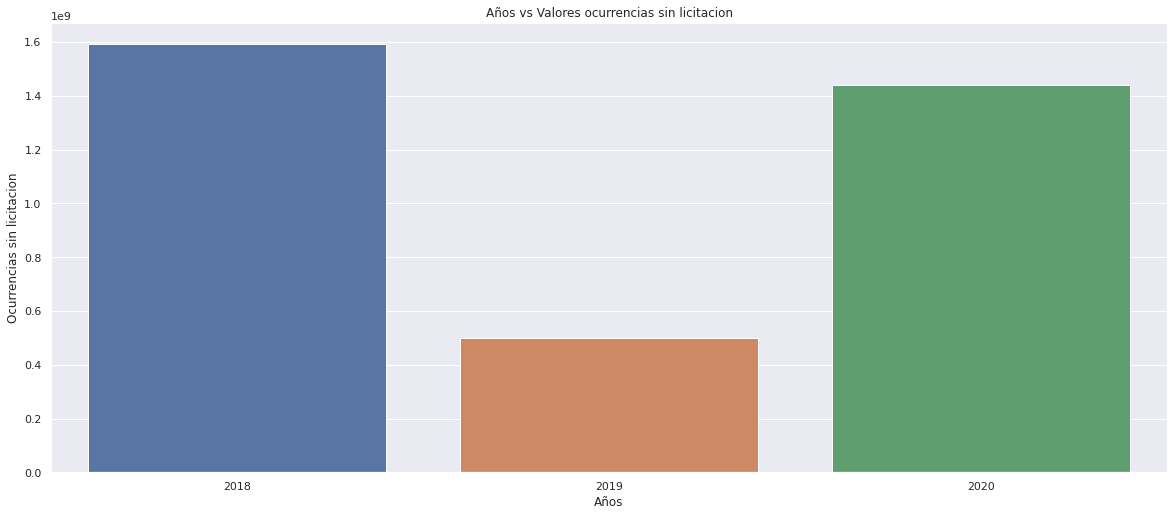

In [213]:
grafico =  GenerarInforme()
grafico.lista1 = calculoReleaseAndParty2018.obtenerOcurrenciasSinLicitacion()
grafico.lista2= calculoReleaseAndParty2019.obtenerOcurrenciasSinLicitacion()
grafico.lista3 = calculoReleaseAndParty2020.obtenerOcurrenciasSinLicitacion()
grafico.generarGraficoLicitaciones()

A continuación se trató de hacer cuatro graficos mostrando la frecuencia de las observaciones del estatus de cada licitación para todos los años. 
El primer gráfico muestra las observaciones para el estatus de "Completado", el segundo muestra el estatus de "Cancelado", el siguiente es el de "Activos" y el último muestra los "Otros" (Aquellos que tenían un estatus de "Planeado" o "En planeación").

In [222]:
class ComparacionRelases:
    def __init__(self, path2016, path2017, path2018, path2019, path2020):
        self.__releases2016 = pd.read_csv(path2016)
        self.__releases2017 = pd.read_csv(path2017)
        self.__releases2018 = pd.read_csv(path2018)
        self.__releases2019 = pd.read_csv(path2019)
        self.__releases2020 = pd.read_csv(path2020)
        self.__dataFrame = self.llenar()


    def llenar(self):
        return {"Años": ["2016", "2017", "2018", "2019", "2020"],
                        "Completado": [self.__releases2016["tender/status"].value_counts()["complete"],
                                       self.__releases2017["tender/status"].value_counts()["complete"],
                                       self.__releases2018["tender/status"].value_counts()["complete"],
                                       self.__releases2019["tender/status"].value_counts()["complete"],
                                       self.__releases2020["tender/status"].value_counts()["complete"]],
                        "Cancelado": [self.__releases2016["tender/status"].value_counts()["cancelled"],
                                      self.__releases2017["tender/status"].value_counts()["cancelled"],
                                      self.__releases2018["tender/status"].value_counts()["cancelled"],
                                      self.__releases2019["tender/status"].value_counts()["cancelled"],
                                      self.__releases2020["tender/status"].value_counts()["cancelled"]],
                        "Activo": [self.__releases2016["tender/status"].value_counts()["active"],
                                   self.__releases2017["tender/status"].value_counts()["active"],
                                   self.__releases2018["tender/status"].value_counts()["active"],
                                   self.__releases2019["tender/status"].value_counts()["active"],
                                   self.__releases2020["tender/status"].value_counts()["active"]],
                        "En planeacion": [self.__releases2016["tender/status"].value_counts()["planning"],
                                          self.__releases2017["tender/status"].value_counts()["planning"],
                                          self.__releases2018["tender/status"].value_counts()["planning"],
                                          self.__releases2019["tender/status"].value_counts()["planning"],
                                          self.__releases2020["tender/status"].value_counts()["planning"]],
                        "Planeado": [0,
                                     0,
                                     0,
                                     self.__releases2019["tender/status"].value_counts()["planned"],
                                     self.__releases2020["tender/status"].value_counts()["planned"]]}


    def graficarMaplotlin(self):
      listOtros = list()
      for x in range(5):
        listOtros.append((self.__dataFrame["En planeacion"][x] + self.__dataFrame["Planeado"][x]))
        
      self.__dataFrame["Otros"] = listOtros
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(20,8.27)
      ax1.bar(self.__dataFrame["Años"], self.__dataFrame["Completado"])
      
      ax1.set_title("Años vs Observaciones completados")
      ax1.set_xlabel("Años")
      ax1.set_ylabel("Observaciones completadas")

      ax2.bar(self.__dataFrame["Años"], self.__dataFrame["Cancelado"])

      ax2.set_title("Años vs Observaciones canceladas")
      ax2.set_xlabel("Años")
      ax2.set_ylabel("Observaciones canceladas")

      fig, (ax3, ax4) = plt.subplots(1, 2)
      fig.set_size_inches(20,8.27)
      ax3.bar(self.__dataFrame["Años"], self.__dataFrame["Activo"])

      ax3.set_title("Años vs Observaciones activas")
      ax3.set_xlabel("Años")
      ax3.set_ylabel("Observaciones activas")

      ax4.bar(self.__dataFrame["Años"], self.__dataFrame["Otros"])

      ax4.set_title("Años vs Otras observaciones")
      ax4.set_xlabel("Años")
      ax4.set_ylabel("Otras observaciones")

      plt.show()

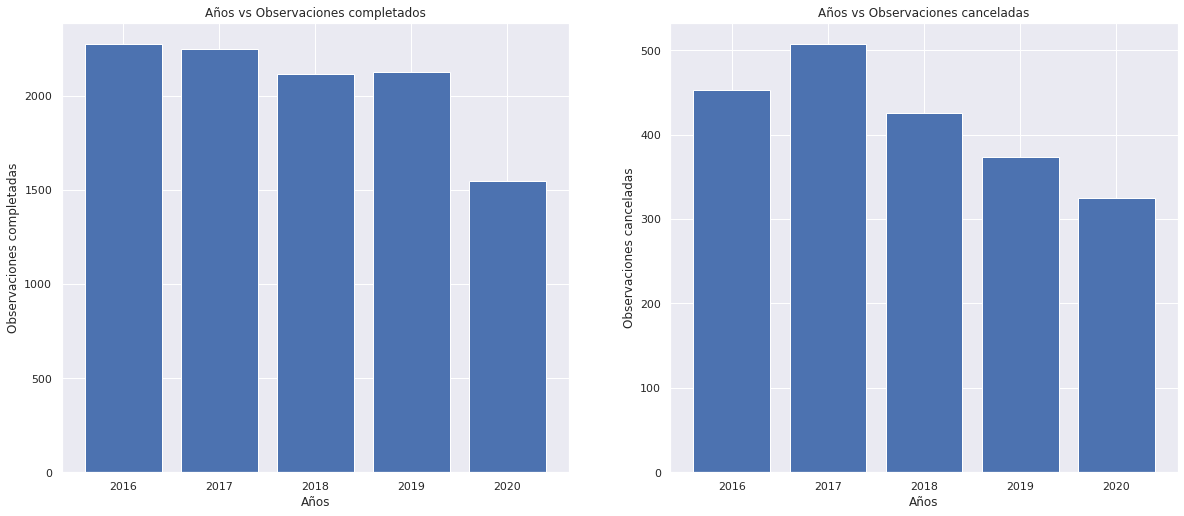

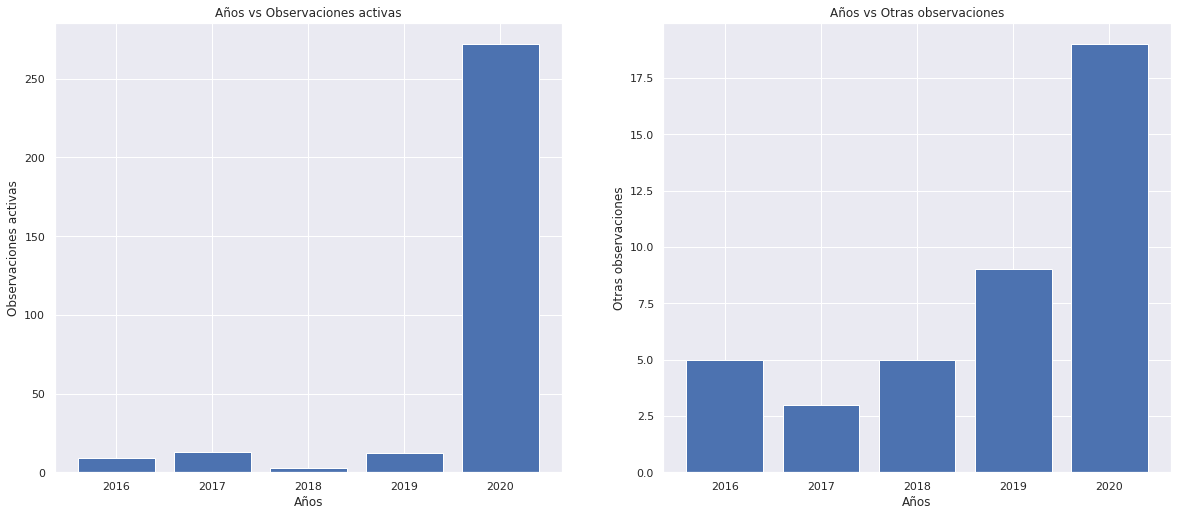

In [223]:
rel2016 = "/content/releases2016.csv"
rel2017 = "/content/releases2017.csv"
rel2018 = "/content/releases2018.csv"
rel2019 = "/content/releases2019.csv"
rel2020 = "/content/releases2020.csv"
comp = ComparacionRelases(rel2016,rel2017,rel2018,rel2019,rel2020)
comp.llenar()
comp.graficarMaplotlin()

Seguidamente se procede a mostar otra variable descriptiva, la cual indica qué era lo que se pedía en cada contratación pública (O bienes o servicios). 

In [216]:
class FrecuenciaBienes:
    def __init__(self):
      self.__rel2016 = pd.read_csv("/content/releases2016.csv")
      self.__rel2017 = pd.read_csv("/content/releases2017.csv")
      self.__rel2018 = pd.read_csv("/content/releases2018.csv")
      self.__rel2019 = pd.read_csv("/content/releases2019.csv")
      self.__rel2020 = pd.read_csv("/content/releases2020.csv")

    def generarListaPorCategorias(self, category):
      return [self.__rel2016["tender/mainProcurementCategory"].value_counts()[category], self.__rel2017["tender/mainProcurementCategory"].value_counts()[category], self.__rel2018["tender/mainProcurementCategory"].value_counts()[category], self.__rel2019["tender/mainProcurementCategory"].value_counts()[category], self.__rel2020["tender/mainProcurementCategory"].value_counts()[category]]

    def generarDiccionarioCat(self):
      return {"Años":["2016","2017","2018","2019","2020"],"Bienes":self.generarListaPorCategorias("goods"), "Servicios":self.generarListaPorCategorias("services")}
   
    def GenerarGrafico(self):
      a4_dims = (20,8.27)
      dfCC = pd.DataFrame(data = self.generarDiccionarioCat())     
      sns.set(rc={"figure.figsize":(10,5)})
      fig, ax = plt.subplots(figsize=a4_dims)
      ax = sns.lineplot(x="Años", y="Bienes", data=dfCC, marker="o", color="red")
      ax2 = sns.lineplot(x="Años", y="Servicios", data=dfCC, marker="o", color="blue")
      for x, y in zip(dfCC["Años"], dfCC["Bienes"]):
          plt.text(x = x, y = y-45, s = str(y))
      for p, q in zip(dfCC["Años"], dfCC["Servicios"]):
          plt.text(x = p, y = q+10, s = str(q))
      plt.legend(labels = ["Bienes","Servicios"])
      plt.ylabel("Frecuencia")
      plt.title("Frecuencia de bienes y servicios vs Años ")
      plt.show()

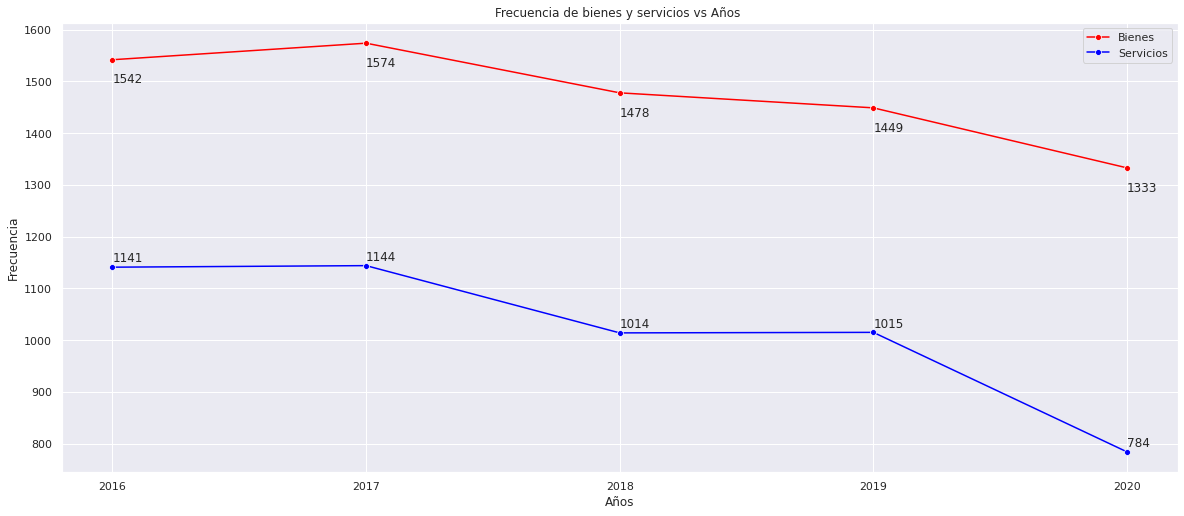

In [217]:
frecuenciaBienes = FrecuenciaBienes()
frecuenciaBienes.GenerarGrafico()

# Resultados obtenidos

Se pudo observar cuántos oferentes solían tener en cada licitación, además de que también se mostró cuáles de entre esos oferentes fueron proveedores y si existían algunos en particular que se repetían constantemente en esas contrataciones abiertas.

# Análsis de los resultados

Dado que habían licitaciones cuyos id no estaban presentes en Parties (indicando que no tuvieron oferentes del todo), era adecuado observar cuales eran estas licitaciones y encontrar una razón del fenomeno.
Resultó ser que la mayoría de todas esas contrataciones que no tuvieron oferentes tenían un estatus de "cancelado", explicando el hecho de por qué nadie se ofreció para brindar los bienes o servicios.
Sin embargo habían dos que presentaban el estatus de "completado", las cuales eran convenios con otras entidades públicas. Un debido análisis de estos dos casos se podría realizar a futuro.

También se encontraron resultados interesantes con los proveedores. Por un lado, como habían varios casos en donde la licitación presenta más de un proveedor, incluso llegando hasta 14 proveedores (el caso de una campaña de medios de comunicación donde varios medios fueron proveedores del servicio). Además de como eran compañías grandes las que solían ser las ganadores de las contrataciones abiertas, demostrando el poder de mercado que tienen incluso en este ámbito. 

# Conclusiones

El Poder Judicial solía tener varios oferentes por cada licitación, siendo los casos en que eran 1 o menos, relativamente escazos. Esto es una buena señal en el sentido que muestra una diversidad de productos y opciones para las distintas contrataciones que llevaba a cabo la Corte Suprema.


Por otro lado, también se observó cómo eran las empresas grandes las que dominaban como proveedores, mostrando una posible tendencia a la acaparación o monopolización de estas contrataciones abiertas. 

Como observación final, resultó curioso ver cómo los bienes, por encima de los servicios, fueron los más presentes en las contrataciones abiertas.

# Recomendaciones

Al codigo aún se le podría dar muchísima más profundidad y análisis estadístico adecuado. También, para las variables descriptivas faltó identificar y graficar otras que hubieran sido interesantes. Finalmente, no se pudo realizar el analisis de proveedores y oferentes para los años 2016 y 2017, ya que en las Parties de ambos años, todos los involucrados para cada licitación aparecían como proveedores. No se sabe con seguridad si esto fue un error a la hora de incluir los datos o si verdaderamente era así como debían estar. 

Independienmente de esto, cada uno de los miembros del equipo consideró este Data Challenge como una experiencia didáctica y enriquecedora para los conocimientos personales con lo que respecta al manejo de datos. Se espera que, a futuro, se pueda continuar creciendo, mejorando en las áreas de interés y poder aplicar lo aprendido en este período.